In [1]:
import torch
from PIL import Image
from torchvision import transforms
from torchvision import models
import torch.nn as nn
from data_images import DataInfo
import os
import json
from IPython.display import Image as Image_Open


In [2]:
#Transformations for the images
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    #normalizing the colors 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    #resnet18 needs images to be 256,256
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    #normalizing the colors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
#Image Transformation 
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
unique_labels = []
meta_dir = "../../meta.json"
with open(meta_dir, "r") as file:
    data = json.load(file)
for i in data["classes"]: 
    unique_labels.append(i["title"])
classes =  list(set(unique_labels))

In [5]:
#Loading and testing the model
model = models.resnet18(pretrained=True)

num_classes = 498

model.fc = nn.Linear(model.fc.in_features, num_classes)
try:
    base_dir = os.path.dirname(__file__)  # Path of the script
except NameError:
    base_dir = os.getcwd() 
model_path = os.path.join(base_dir, "../../resnet18_images.pth") 

model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'), weights_only=True))
model.eval()

image_path = "051098.jpg"

image = Image.open(image_path).convert("RGB")
transform = val_transform
device = torch.device('cpu')
input_tensor = transform(image).unsqueeze(0)
with open("../../encodings.json", "r") as f:
    label_to_index = json.load(f)

index_to_label = {v: k for k, v in label_to_index.items()}


with torch.no_grad():
    outputs = model(input_tensor)  
    predicted_index = torch.argmax(outputs, dim=1).item()  
    predicted_label = index_to_label[predicted_index]  



print("Predicted Label: ", predicted_label )


C:\Users\gabby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\gabby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted Label:  waffle


TEST CASES

In [6]:
#Making the process into a function 
def run_image_model(img_path=""):
    img_path = img_path
    if img_path == "": 
        return "Please Select Image"
    image = Image.open(img_path).convert("RGB")
    transform = val_transform
    input_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(input_tensor)  
        predicted_index = torch.argmax(outputs, dim=1).item()  
        predicted_label = index_to_label[predicted_index]  
    print("Predicted Label: ", predicted_label )
    

TEST CASE 1


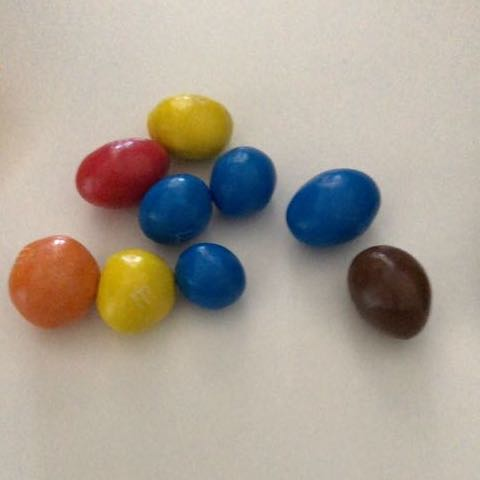

In [7]:
print("TEST CASE 1")
img1 = '037568.jpg' 
Image_Open(filename=img1)

In [8]:

run_image_model(img1)

Predicted Label:  m-m-s


TEST CASE 2


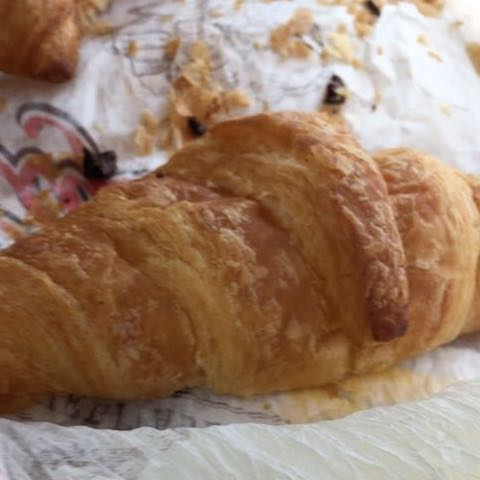

In [9]:
print("TEST CASE 2")
img2 = '041845.jpg' 
Image_Open(filename=img2)


In [81]:
run_image_model(img2)

Predicted Label:  croissant


TEST CASE 3


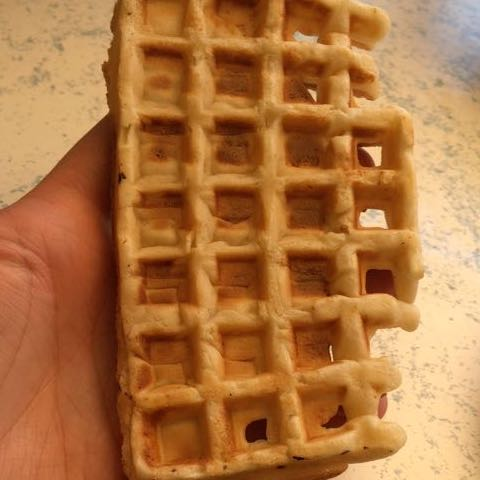

In [71]:
print("TEST CASE 3")
img3 = '051098.jpg' 
Image_Open(filename=img3)


In [82]:
run_image_model(img3)


Predicted Label:  waffle


TEST CASE 4: 
Predicted Label:  risotto-without-cheese-cooked


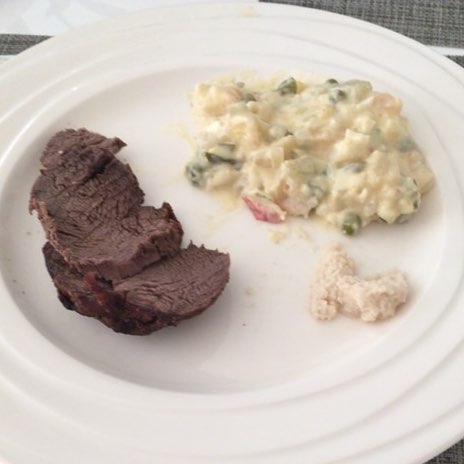

In [ ]:
print("TEST CASE 4: ")
Image_Open(filename="071380.jpg")

In [83]:
run_image_model("071380.jpg")

Predicted Label:  risotto-without-cheese-cooked


TEST CASE 5:


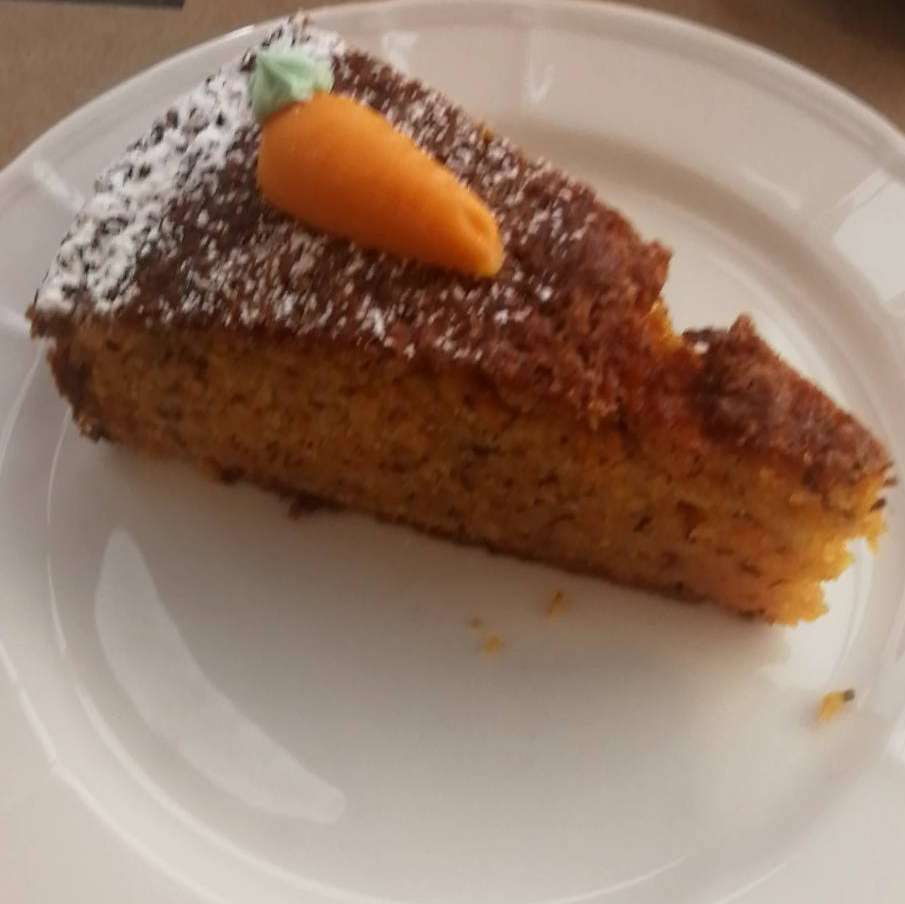

In [84]:
print("TEST CASE 5:")
img5 = "082942.jpg"
Image_Open(filename=img5)

In [85]:
run_image_model(img5)

Predicted Label:  carrot-raw
